In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from utils import *
df = pd.read_csv("SPY.csv")

params = {'num_states': 2,
          'sig0': 1,
          'sig1': 3,
          'p': 0.95,
          'q': 0.95,
          'd0': 1 ,
          'v0': 1,
          'u00': 10, #p11 ~ D(u00,u01)
          'u01': 5,
          'u11': 10, #p11 ~ D(u11,u10)
          'u10': 5,
          'reps': 100
        }

burnin = 1000

x, y = preprocess_ts(df['Close'], lags=2)
out1, out2, out3 = estimate(x, y, **params)



/Users/lorenzoflores/Documents/GitHub/bayes-for-markov-switching/utils.py:39: RuntimeWarning: invalid value encountered in true_divide
  ett11 = ett11/fit
/Users/lorenzoflores/Documents/GitHub/bayes-for-markov-switching/utils.py:41: RuntimeWarning: divide by zero encountered in log
  total_likelihood += np.log(fit)


Text(0.5, 1.0, 'Probability of State 1 \n p00: 0.925, p01: 0.075, p10: 0.632, p11: 0.368')

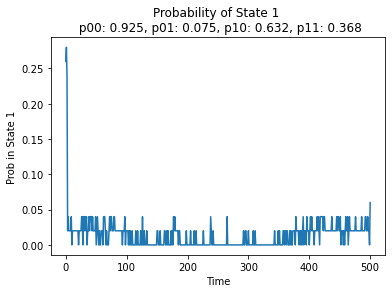

In [42]:
# Plot probability across states
S = np.vstack(out1).mean(axis=0)
p00, p01, p10, p11 = list(np.stack(out2).reshape(50, -1).mean(axis=0))
plt.plot(S)
plt.xlabel('Time')
plt.ylabel('Prob in State 1')
plt.title(f"Probability of State 1 \n p00: {round(p00,3)}, p01: {round(p01,3)}, p10: {round(p10,3)}, p11: {round(p11,3)}")

In [73]:
# Collect parameters
final_params = {'phi0':[], 'phi1':[], 'sigma0':[], 'sigma1':[], 'mu':[]}
for d in out3:
    for key in d:
        final_params[key].append(d[key])
for key in final_params:
    out_matrix = np.vstack([i.reshape(-1) for i in final_params[key]])
    print(f"{key}: {', '.join([f'{round(m,3)} ({round(s,3)})' for (m,s) in zip(out_matrix.mean(axis=0), out_matrix.std(axis=0))])}")
    

phi0: 1.009 (0.055), 0.061 (0.388), -0.056 (0.305), -0.001 (0.043)
phi1: -0.48 (9.139), -0.466 (10.35), 0.003 (9.508), -1.057 (9.803)
sigma0: 0.003 (0.006)
sigma1: 6593.182 (44997.702)
mu: -1.412 (11.04), -0.775 (10.075)
